In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

/Users/libanmohamoudahmed/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
coffee = pd.read_csv('COFFEEQUALITYTRAINDATA.csv')

In [3]:
coffee.head(10)

,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper_Points,Altitude
0,1.0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,20.75
1,1.0,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,20.75
2,14.0,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,10.00,9.25,17.00
3,1.0,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,20.00
4,1.0,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,20.75
5,11.0,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.0,10.00,8.33,20.00
6,4.0,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.0,10.00,8.50,20.00
7,1.0,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.0,9.33,9.00,16.35
8,1.0,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.0,9.33,8.67,16.35
9,1.0,8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.0,10.00,8.50,18.23


In [4]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 12 columns):
Country          1294 non-null float64
Aroma            1294 non-null float64
Flavor           1294 non-null float64
Aftertaste       1294 non-null float64
Acidity          1294 non-null float64
Body             1294 non-null float64
Balance          1294 non-null float64
Uniformity       1294 non-null float64
Clean.Cup        1294 non-null float64
Sweetness        1294 non-null float64
Cupper_Points    1294 non-null float64
Altitude         1294 non-null float64
dtypes: float64(12)
memory usage: 121.4 KB


In [5]:
coffee.isnull().sum()

Country          0
Aroma            0
Flavor           0
Aftertaste       0
Acidity          0
Body             0
Balance          0
Uniformity       0
Clean.Cup        0
Sweetness        0
Cupper_Points    0
Altitude         0
dtype: int64

In [6]:
#Preprocessing Data
bins = (2, 7.8, 8.83)
group_names = ['bad', 'good']
coffee['Flavor'] = pd.cut(coffee['Flavor'], bins = bins, labels = group_names)
coffee['Flavor'].unique()


[good, bad]
Categories (2, object): [bad < good]

In [7]:
label_Flavor = LabelEncoder()

In [8]:
coffee['Flavor'] = label_Flavor.fit_transform(coffee['Flavor'])

In [9]:
coffee.head(50)

,Country,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper_Points,Altitude
0,1.0,8.67,1,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,20.75
1,1.0,8.75,1,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,20.75
2,14.0,8.42,1,8.42,8.42,8.33,8.42,10.00,10.0,10.00,9.25,17.00
3,1.0,8.17,1,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,20.00
4,1.0,8.25,1,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,20.75
5,11.0,8.58,1,8.42,8.50,8.25,8.33,10.00,10.0,10.00,8.33,20.00
6,4.0,8.42,1,8.33,8.50,8.25,8.25,10.00,10.0,10.00,8.50,20.00
7,1.0,8.25,1,8.50,8.42,8.33,8.50,10.00,10.0,9.33,9.00,16.35
8,1.0,8.67,1,8.58,8.42,8.33,8.42,9.33,10.0,9.33,8.67,16.35
9,1.0,8.08,1,8.50,8.50,7.67,8.42,10.00,10.0,10.00,8.50,18.23


In [10]:
coffee['Flavor'].value_counts()

0    1064
1     230
Name: Flavor, dtype: int64

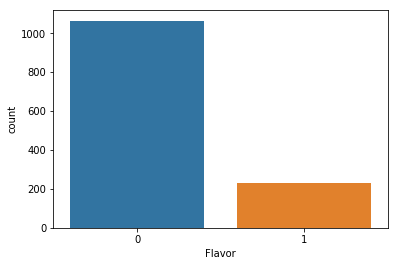

In [11]:
#Plot seperate bins created seperating the good quality coffee 
sns.countplot(coffee['Flavor'])


In [12]:
X = coffee.drop('Flavor', axis = 1)
y = coffee['Flavor']

In [13]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
#Applying Standard scaling to get optimum results

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
#RandomForestClassifier Algorithm

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [16]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [17]:
#Evaluate how the model performs
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc)) #how many correct and incorrect

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       272
          1       0.73      0.69      0.71        52

avg / total       0.91      0.91      0.91       324

[[259  13]
 [ 16  36]]


In [18]:
#SVM Classifier
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [19]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       272
          1       0.72      0.63      0.67        52

avg / total       0.90      0.90      0.90       324

[[259  13]
 [ 19  33]]


In [40]:
#Neural Network

mlpc = MLPClassifier(hidden_layer_sizes=(3,3,3),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [41]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
# Print the accuracy of the results and compare with the other algorhtims

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       272
          1       0.73      0.58      0.65        52

avg / total       0.89      0.90      0.89       324

[[261  11]
 [ 22  30]]


In [42]:
#Predict new values

Xnew = [[4,8.3,7.8,8.1,8.3,8.5,8.4,10,10,10,8.6,20.5]]
Xnew = sc.transform(Xnew)
ynew= mlpc.predict(Xnew)
ynew

ValueError: operands could not be broadcast together with shapes (1,12) (11,) (1,12) 